# Clusters con DBSCAN

## Un poco de teoría...

Explicación extraída de `ChatGPT`:

El **modelo DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de **agrupamiento (clustering)** utilizado para encontrar grupos de puntos (clusters) en datos espaciales, sin necesidad de que el número de grupos sea predefinido. Es particularmente eficaz para detectar clusters de forma arbitraria y para identificar puntos atípicos (outliers).

### Características principales:

1. **Basado en densidad**: DBSCAN forma clusters basándose en la densidad de puntos cercanos entre sí. Esto significa que un cluster se define como una región densa de puntos, donde los puntos dentro de un cluster están suficientemente cerca unos de otros según un umbral predefinido.

2. **No requiere número de clusters**: A diferencia de algoritmos como K-means, DBSCAN no necesita que el número de clusters se especifique de antemano. Este número se determina automáticamente según la estructura de los datos y los parámetros elegidos.

3. **Detección de ruido (outliers)**: DBSCAN puede identificar y marcar puntos que no pertenecen a ningún cluster, considerándolos como ruido. Esto es útil cuando se trabajan con datos que contienen puntos atípicos.

### Parámetros importantes:

- **ε (epsilon)**: Es el radio de vecindad de un punto. Es el parámetro que define qué tan cerca deben estar los puntos para que se consideren parte del mismo cluster.
- **MinPts**: Es el número mínimo de puntos necesarios para formar un cluster. Si un punto tiene al menos `MinPts` puntos dentro de su vecindad (definida por ε), se considera un punto central que puede generar un nuevo cluster.

### Categorías de puntos en DBSCAN:

1. **Puntos centrales**: Son aquellos que tienen al menos `MinPts` puntos dentro de su vecindad (en un radio ε).
2. **Puntos de frontera**: Son aquellos que no tienen suficientes puntos en su vecindad para ser considerados centrales, pero están dentro de la vecindad de un punto central.
3. **Puntos de ruido**: Son aquellos que no pertenecen a ningún cluster, es decir, no tienen suficientes puntos cercanos y no están dentro de la vecindad de ningún punto central.

### Ventajas de DBSCAN:

- **Detección de formas arbitrarias de clusters**: No está limitado a clusters de forma esférica, como K-means, y puede identificar estructuras más complejas.
- **Manejo de ruido**: Detecta y maneja bien los puntos atípicos o ruido en los datos.
- **No requiere la cantidad de clusters**: El número de clusters se adapta automáticamente.

### Desventajas:

- **Sensibilidad a los parámetros**: La elección de ε y MinPts puede afectar significativamente los resultados. Si no se eligen correctamente, DBSCAN puede no identificar bien los clusters.
- **Problemas con clusters de diferente densidad**: DBSCAN tiene dificultades para identificar clusters con densidades muy dispares, ya que un único valor de ε puede no ser adecuado para todos los clusters.

## Ejemplo visual

En las siguiente imágenes, se presenta un paso a paso que demuestra cómo funciona este algoritmo en la detección de clústeres en un conjunto dado de datos según un $\epsilon$ establecido (radio del círculo que se tomará para evaluar la densidad de puntos en su área), y según también la cantidad mínima de puntos que deberá tener dicha área para considerarse como un punto CORE, es decir, un punto central de una porción de área densa.

![DBSCAN paso a paso](./img/dbscan1.png)

![DBSCAN paso a paso](./img/dbscan2.png)

![DBSCAN paso a paso](./img/dbscan3.png)

![DBSCAN paso a paso](./img/dbscan4.png)

![DBSCAN paso a paso](./img/dbscan5.png)

![DBSCAN paso a paso](./img/dbscan6.png)

![DBSCAN paso a paso](./img/dbscan7.png)

![DBSCAN paso a paso](./img/dbscan8.png)

![DBSCAN paso a paso](./img/dbscan9.png)

![DBSCAN paso a paso](./img/dbscan10.png)

![DBSCAN paso a paso](./img/dbscan11.png)

![DBSCAN paso a paso](./img/dbscan12.png)

![DBSCAN paso a paso](./img/dbscan13.png)

![DBSCAN paso a paso](./img/dbscan14.png)

![DBSCAN paso a paso](./img/dbscan15.png)

![DBSCAN paso a paso](./img/dbscan16.png)

Es importante aclarar que en el paso final en el que se incorporan puntos contigüos a los CORE, aunque dichos puntos contigüos que tal vez antes eran ruido ahora pasan a formar parte del clúster, no se los puede tomar después como CORE también para seguir añadiendo luego más puntos a partir de ellos dado que originalmente no lo eran.

## Ejemplo con Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [6]:
# cargar datos
# datos = np.loadtxt("../datos/casas.csv", delimiter=",")
datos = pd.read_csv("../datos/casas.csv").values
datos[0:5,]

array([[ 1, 10],
       [ 1, 17],
       [ 1, 23],
       [ 1, 24],
       [ 1, 26]])

In [8]:
# Identificar clusters
model = DBSCAN(eps=2, # radio 
                  min_samples=10) # cantidad minima de puntos para considerar el area alrededor del punto como densa
clusters = model.fit_predict(datos)
print(clusters)

[-1 -1  0  0  0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  1 -1 -1
  0  0  0  0  0  0  0  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  1  1  1
  1  1  1 -1 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  0
  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0 -1
  1  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0
  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  2  2  2 -1 -1 -1  0  0
  0  0  0  0  0  2  2  2  2  2  2  2  0  0  0  0  0  0  2  2  2  2  2  2
  2  2  2 -1 -1 -1  0  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1  2  2  2  2
  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1 -1  2  2 -1]


En función de este caso analizado, tener en cuenta que los valores:

* $0, 1, 2$: son las etiquetas de los 3 clusters detectados.
* $-1$: son los puntos considerados como *ruido*. 

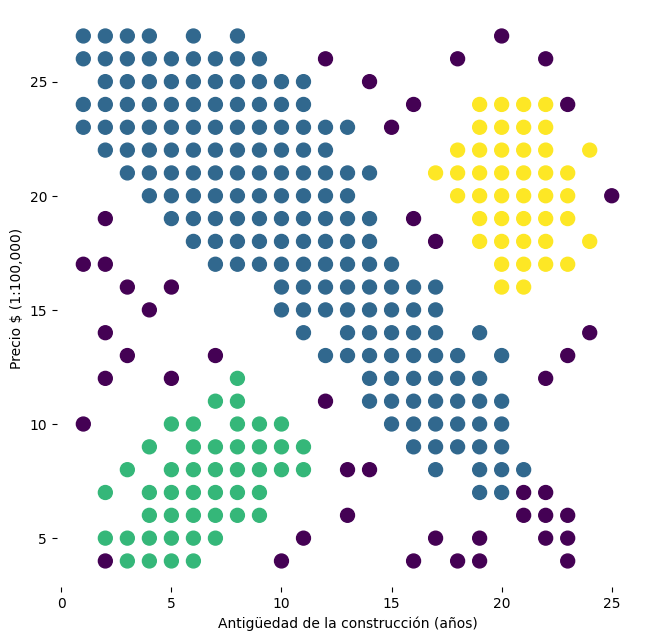

In [9]:
# Gráfica de matplotlib para ver los clusters
plt.figure(figsize=(7.5, 7.5))
plt.scatter(datos[:, 0], datos[:, 1], c=clusters, s=100)
plt.xlabel("Antigüedad de la construcción (años)")
plt.ylabel("Precio $ (1:100,000)")
plt.box(False)
plt.show()